In [7]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [8]:
class Perceptron:
    def __init__(self, input_size):
        # Inicializamos los pesos y el sesgo de manera aleatoria
        self.weights = np.random.rand(input_size)
        self.bias = np.random.rand()

    def sigmoid(self, x):
        # Función de activación: sigmoide
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        # Derivada de la función sigmoide
        return x * (1 - x)

    def predict(self, inputs):
        # Calculamos la suma ponderada de las entradas
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        # Aplicamos la función de activación y devolvemos la predicción
        return self.sigmoid(weighted_sum)

    def train(self, X_train, Y_train, X_validation, Y_validation, learning_rate=0.1, epochs=100):

        train_error_by_epoch = []
        val_error_by_epoch = []

        for epoch in range(epochs):
            train_error_acum = 0
            for i in range(X_train.shape[0]):

                inputs = X_train[i]

                # Calcular la predicción del perceptrón
                prediction = self.predict(inputs)

                # Calcular el error
                error = Y_train[i] - prediction
                train_error_acum += error ** 2  # Aquí se acumula el cuadrado del error

                # Actualizar pesos y sesgo mediante el descenso del gradiente
                self.weights += learning_rate * error * inputs
                self.bias += learning_rate * error

            # Calcular el error promedio por epoch
            train_error_acum /= X_train.shape[0]

            val_error_acum = 0
            for i in range(X_validation.shape[0]):
                inputs = X_validation[i]
                prediction =  self.predict(inputs)

                error = Y_validation[i] - prediction
                val_error_acum += error ** 2

            # Calcular el error promedio de validación por epoch
            val_error_acum /= X_validation.shape[0]

            # Guardar los errores para la visualización
            train_error_by_epoch.append(train_error_acum)
            val_error_by_epoch.append(val_error_acum)

            # Visualización del progreso
            if epoch % 10 == 0:
                print('epoch:', epoch, '| train error:', train_error_acum, '| val error:', val_error_acum)

        # Visualización del error de entrenamiento por epoch
        plt.figure()
        plt.plot(range(epochs), train_error_by_epoch, '-b')
        plt.xlabel('Epoch')
        plt.ylabel('Error cuadrático promedio')
        plt.title('Error de Entrenamiento por Epoch')
        plt.show()

        # Visualización del error de validación por epoch
        plt.figure()
        plt.plot(range(epochs), val_error_by_epoch, '-b')
        plt.xlabel('Epoch')
        plt.ylabel('Error cuadrático promedio')
        plt.title('Error de Validación por Epoch')
        plt.show()

In [9]:
# Datos de entrenamiento y validación para la puerta AND
N_samples = 5000  # número de muestras
N_inputs = 2  # número de entradas (son las VARIABLES)
train_size = 0.7  # proporción de datos de entrenamiento

N_validation = int((1 - train_size) * N_samples)

X_train = np.random.randint(0, 2, size=(N_samples, N_inputs))  # datos de entrada
Y_train = np.logical_and(X_train[:, 0], X_train[:, 1]).astype(int)  # salida esperada (AND)

X_validation = X_train[N_samples - N_validation:]  # datos de validación
Y_validation = Y_train[N_samples - N_validation:]  # salida esperada para datos de validación

X_train = X_train[:N_samples - N_validation]  # datos de entrenamiento
Y_train = Y_train[:N_samples - N_validation]  # salida esperada para datos de entrenamiento

# Visualizar algunas muestras
print("X_data (first 5 samples):")
print(X_train[:5])

print("Y_data (first 5 samples):")
print(Y_train[:5])


X_data (first 5 samples):
[[1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]]
Y_data (first 5 samples):
[0 1 0 1 0]


In [10]:
# Crear y entrenar el perceptrón para la puerta AND
perceptron_and = Perceptron(input_size=N_inputs)

epoch: 0 | train error: 0.02603538554141819 | val error: 0.0031638274032187675
epoch: 10 | train error: 3.0466700800787714e-05 | val error: 2.772193537962757e-05
epoch: 20 | train error: 7.924148510203154e-06 | val error: 7.5695970174940786e-06
epoch: 30 | train error: 3.566327160805572e-06 | val error: 3.4659829502991586e-06
epoch: 40 | train error: 2.0181706554903465e-06 | val error: 1.9787659078165835e-06
epoch: 50 | train error: 1.2961419539526692e-06 | val error: 1.27766307991439e-06
epoch: 60 | train error: 9.021319077640096e-07 | val error: 8.924771097305974e-07
epoch: 70 | train error: 6.638320741690159e-07 | val error: 6.584269509377864e-07
epoch: 80 | train error: 5.088312234539398e-07 | val error: 5.056708898523111e-07
epoch: 90 | train error: 4.02391623520938e-07 | val error: 4.0049955467409666e-07


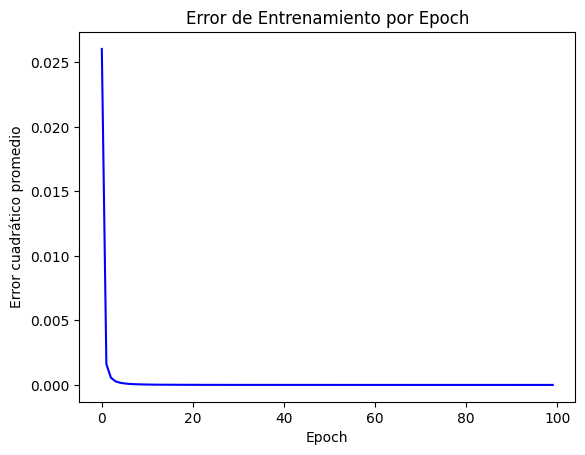

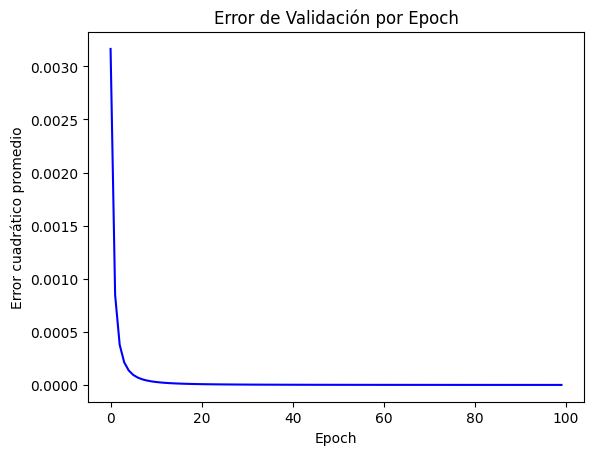

In [11]:
# Entrenar el perceptrón
perceptron_and.train(X_train, Y_train, X_validation, Y_validation)

In [12]:
# Validar el modelo

# Generar las predicciones
predictions_train = np.array([perceptron_and.predict(inputs) for inputs in X_train])
predictions_validation = np.array([perceptron_and.predict(inputs) for inputs in X_validation])

# Redondear las predicciones a 0 o 1
predictions_train = np.round(predictions_train)
predictions_validation = np.round(predictions_validation)

# Calcular la matriz de confusión
confusion_matrix_train = confusion_matrix(Y_train, predictions_train)
confusion_matrix_validation = confusion_matrix(Y_validation, predictions_validation)

# Visualizar la matriz de confusión
print("Matriz de Confusión (Entrenamiento):")
print(confusion_matrix_train)

print("\nMatriz de Confusión (Validación):")
print(confusion_matrix_validation)

Matriz de Confusión (Entrenamiento):
[[2659    0]
 [   0  841]]

Matriz de Confusión (Validación):
[[1121    0]
 [   0  379]]
